# DSP1: Endterm

### Date: February 16

### Time: 18:00 - 19:30


**Instructions:** 
* All answers should be filled in the notebook and then submitted to Moodle;
* For theoretical question you can use markdown and LaTeX;
* Save number of cells used for compilation;
* In order to get max scores, please write explanations and comments for each step. In addition, try to comment you code pieces. Use your knowledge of visualising from previous course.

## Problem 1 (35%)
Take the dataset with car prices - cars.csv. Your target variable is Price. You will need to build linear regression model to predict target. Tasks to do:
1.  Define your X and y. Take Year variable and choose two other two explanatory variables to use in your model. It is up to you which one to use, however you should explain your choice without any calculations (just logic).

2. Split your data into train and test samples (**25% for testing**) with random state equal to **777**. 

3. Use sklearn to get the model. Obtain the intercept ( 𝐵0 ) and the coefficients ( 𝐵1,𝐵2,B3 ) for your model.

4. Interpret these coefficients in the context of the problem. Explain and check if all of them make sense?

5. Using test set, evaluate the trained model. Use R-squared and MSE as metrics for evaluation.

6. Write down conclusion of your model, i.e. describe your obtained metric results.

***Hint: to make your life easier, I recommend to use only numerical variables.*** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy import stats
import statistics as st
import math
%matplotlib inline

#### #1 

In [2]:
data = pd.read_csv('cars.csv')
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carBrand,BrandModel
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,Audi,Audi - A1
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,Audi,Audi - A6
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,Audi,Audi - A1
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,Audi,Audi - A4
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,Audi,Audi - A3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34568 entries, 0 to 34567
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         34568 non-null  object 
 1   year          34568 non-null  int64  
 2   price         34568 non-null  int64  
 3   transmission  34568 non-null  object 
 4   mileage       34568 non-null  int64  
 5   fuelType      34568 non-null  object 
 6   tax           34568 non-null  int64  
 7   mpg           34568 non-null  float64
 8   engineSize    34568 non-null  float64
 9   carBrand      34568 non-null  object 
 10  BrandModel    34568 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.9+ MB


In [4]:
for x in data.dtypes[data.dtypes == "object"].keys():
    groups = list(data.groupby(x).count().index)
    for i, y in enumerate(groups):
        data[x] = data[x].replace(y, i)
    data[x] = data[x].astype(int)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carBrand,BrandModel
0,9,2017,12500,1,15735,4,150,55.4,1.4,0,0
1,14,2016,16500,0,36203,0,20,64.2,2.0,0,5
2,9,2016,11000,1,29946,4,30,55.4,1.4,0,0
3,12,2017,16800,0,25952,0,145,67.3,2.0,0,3
4,11,2019,17300,1,1998,4,145,49.6,1.0,0,2


In [5]:
X = data.drop(columns = "tax")
y = data["tax"]
# The price is integer integer variable, also another columns are for classifications. Price is for regression

### #2

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

### #3

In [7]:
from sklearn.linear_model import LinearRegression

re = LinearRegression().fit(X_train, y_train)

print("Coefficients:", re.coef_ ,"\n")
print("Intercept:", re.intercept_)

Coefficients: [-3.60863922e-02 -2.11904229e+00 -7.11346377e-04  5.59205349e-02
 -5.78785435e-04  6.51466534e+00 -7.71987024e-01  3.52244837e+01
 -6.08426725e+01  2.57627303e+00] 

Intercept: 4375.5023637566865


### #4

#### In linear regression plots the lines in graphs.
#### Intercept is interpection point in y axis
#### A linear relationship between a dependent variable y and two or more independent variables (x1, x2, x3 . . . , xk) ####
\begin{align}
y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n 
\end{align}

### #5

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = re.predict(X_test)

print("MSE:", mean_squared_error(y_test,y_pred))
print("R2: ", r2_score(y_test,y_pred))

MSE: 3004.8479797796563
R2:  0.33337579593554956


### #6

#### Mean squared error loss, also known as quadratic loss, L2 loss,
####  is often used in regression prediction tasks. 
#### The mean squared error function measures the quality of the model by calculating 
#### the square of the distance (ie, the error) between the predicted and actual values. That is, 
#### the closer the predicted value is to the actual value, the smaller the mean square error of the two.
#### MSE is mean squared error regression loss.
#### R2 (coefficient of determination) regression score function.

## Problem 2 (30%)
Use the same dataset with the same goal of predicting price. Take Train set of your dataset that you obtained in Q1, and then do the following:
1. Create new dataframe df_train, which will have X_train and y_train merged.
2. Again build **regression model** but using **statsmodels.**
3. Check if you obtained the same coefficients and intercept as in Q1.3. If there are any difference (up to 0.0001), explain why.
4. Check if you obtained the same R-squared value. If there are any difference (up to 0.0001), explain why.
5. Are all of the variables that you used worth to be used in the model?
6. Can you find evidence for the fact that older cars will cost less?

### 2.1

In [9]:
# Please, write your code here
df_train = X_train.copy()
df_train["price"] = y_train
X_train["intercept"] = 1
df_train.head()

C:\Users\Acer\AppData\Local\Temp/ipykernel_18064/19437373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["intercept"] = 1


,model,year,price,transmission,mileage,fuelType,mpg,engineSize,carBrand,BrandModel
33688,18,2015,30,0,33303,0,64.2,2.1,2,52
5346,11,2017,30,3,28849,4,57.6,1.4,0,2
6186,14,2019,145,0,515,0,37.7,3.0,0,5
32913,8,2018,145,0,6405,0,65.7,1.5,2,50
11553,1,2019,145,1,3266,4,52.3,1.5,1,27


### 2.2

In [10]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tax   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:15:13   Log-Likelihood:            -1.3943e+05
No. Observations:               25926   AIC:                         2.789e+05
Df Residuals:                   25915   BIC:                         2.790e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
model           -0.0361      0.038     -0.939   

### 2.3

In [11]:
print("Coefs in statsmodels:", list(model.params))
print("Coefs in sklearn:    ", list(re.coef_))
print("Intercept in statsmodels:", model.params.intercept)
print("Intercept in sklearn:    ", re.intercept_)
# In both case we using linear regression, and formula for linear regression are same

Coefs in statsmodels: [-0.036086392242389825, -2.1190422929840773, -0.0007113463772074902, 0.055920534880291355, -0.0005787854353936448, 6.514665339840294, -0.7719870236407664, 35.22448374922445, -60.84267251062734, 2.5762730349443856, 4375.502363760787]
Coefs in sklearn:     [-0.036086392242916036, -2.11904229298205, -0.0007113463772070329, 0.05592053488057092, -0.0005787854353932911, 6.514665339840205, -0.7719870236407509, 35.22448374922438, -60.842672510627445, 2.5762730349443888]
Intercept in statsmodels: 4375.502363760787
Intercept in sklearn:     4375.5023637566865


### 2.4

In [12]:
X_test["intercept"] = 1
y_sm_pred = model.predict(X_test)
print("MSE STATSMODELS:", mean_squared_error(y_test,y_sm_pred))
print("MSE SKLEARN:    ", mean_squared_error(y_test,y_pred))
print("R2 STATSMODELS: ", r2_score(y_test,y_sm_pred))
print("R2 SKLEARN:     ", r2_score(y_test,y_pred))

MSE STATSMODELS: 3004.847979779648
MSE SKLEARN:     3004.8479797796563
R2 STATSMODELS:  0.33337579593555133
R2 SKLEARN:      0.33337579593554956


C:\Users\Acer\AppData\Local\Temp/ipykernel_18064/150005669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["intercept"] = 1


### 2.5

There can be variables that have high correlation coefecient

In [13]:
model.params

model             -0.036086
year              -2.119042
price             -0.000711
transmission       0.055921
mileage           -0.000579
fuelType           6.514665
mpg               -0.771987
engineSize        35.224484
carBrand         -60.842673
BrandModel         2.576273
intercept       4375.502364
dtype: float64

### 2.6

<AxesSubplot:xlabel='year', ylabel='price'>

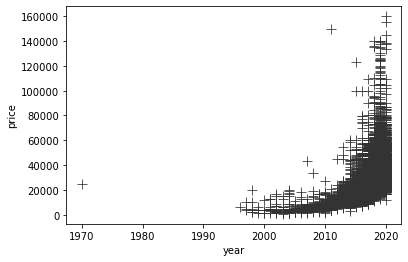

In [14]:
sns.scatterplot(x = data["year"], y = data["price"] ,s=100, color=".2", marker="+")
# The coefecient of year and price is positive

## Problem 3 (35%)
Use dataset about heart strikes - stroke.csv, and your goal is to classify if a person will have a stroke or not (i.e. stroke column is your Target). Using sklearn build logistic regression model to classify stroke. Tasks to do:
1. Which independent variables are numerical and which are categorical? Note that categorical variables can be already encoded to 0 and 1.
2. Among categorical variables, which have binary outcomes and which have more than two outcomes.
3. Find number of strokes and non strokes in your dataset, and check if your dataset is imbalanced.
4. Use **bmi** and **ever_married** as explanatory variables, take them as X. Split your dataset to train and test, test **20%** and random state **555**.
5. Build two **logistic regression** models: one without interaction between independent variables and one with interaction. 
6. Test performance of each model on test dataset using **accuracy, precision and recall metrics**. Comment your results.

***Hint: for interaction you need to create a new column.***

In [15]:
# Please, write your code here
df = pd.read_csv('stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 422.0+ KB


### #1
Independent numerical variables : bmi, avg_glucose_level, age
<br>
Independent categorical variables : gender, hypertension, heart_disease, ever_married, work_typejob, smoking_status

In [17]:
for x in df.dtypes[df.dtypes == "object"].keys():
    groups = list(df.groupby(x).count().index)
    
    for i, y in enumerate(groups):
        df[x] = df[x].replace(y, i)
    df[x] = df[x].astype(int)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### #2

Categorical variables with binary outcomes : hypertension, heart_disease, ever_married, Residence_type
Categroical variables with multi outcomes : gender, smoking_status, work_type

In [18]:
for x in df.dtypes.keys():
    groups = list(df.groupby(x).count().index)
    print(x + ":", len(groups))

gender: 3
age: 104
hypertension: 2
heart_disease: 2
ever_married: 2
work_type: 5
Residence_type: 2
avg_glucose_level: 3852
bmi: 418
smoking_status: 4
stroke: 2


### #3

In [19]:
df.groupby("stroke").count()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,
0,4700,4700,4700,4700,4700,4700,4700,4700,4700,4700
1,209,209,209,209,209,209,209,209,209,209


In [20]:
from sklearn.utils import resample

df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]
df_majority_upsampled = resample(df_majority,replace=True,n_samples=209,random_state=555)
df_upsampled = pd.concat([df_minority, df_majority_upsampled])
df_upsampled.stroke.value_counts()

1    209
0    209
Name: stroke, dtype: int64

### #4

In [21]:
X = df_upsampled[["bmi", "ever_married"]]
y = df_upsampled["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=555)

### #5 and #6

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("Precision: ", precision_score(y_pred, y_test))
print("Recall: ", recall_score(y_pred, y_test))

Accuracy:  0.6
Precision:  0.9361702127659575
Recall:  0.5301204819277109


In [23]:
X = df_upsampled.drop(columns="stroke")
y = df_upsampled["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=555)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

lr = LogisticRegression().fit(X, y)
y_pred = lr.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))
print("Precision: ", precision_score(y_pred, y_test))
print("Recall: ", recall_score(y_pred, y_test))

Accuracy:  0.780952380952381
Precision:  0.8085106382978723
Recall:  0.7307692307692307


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   35/35    |     
| 2       |   30/30 | 
| 3       |   35/35     |     
|**Total**|**100/100**  | 
